## Wildfire data from sqlite database

In [93]:
import sqlite3
import pandas as pd

# Create the connection
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

# create the dataframe from a query
df = pd.read_sql_query("SELECT FIRE_NAME, FIRE_YEAR, DISCOVERY_DOY, STAT_CAUSE_DESCR, FIRE_SIZE, LATITUDE, LONGITUDE FROM Fires WHERE FIRE_YEAR > 2001", cnx)

In [94]:
pd.set_option('display.max_columns', 100)
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE
0,FOUNTAIN,2005,33,Miscellaneous,0.10,40.036944,-121.005833
1,PIGEON,2004,133,Lightning,0.25,38.933056,-120.404444
2,SLACK,2004,152,Debris Burning,0.10,38.984167,-120.735556
3,DEER,2004,180,Lightning,0.10,38.559167,-119.913333
4,STEVENOT,2004,180,Lightning,0.10,38.559167,-119.933056


In [95]:
df.shape

(1125314, 7)

In [96]:
df.isnull().sum()

FIRE_NAME           518031
FIRE_YEAR                0
DISCOVERY_DOY            0
STAT_CAUSE_DESCR         0
FIRE_SIZE                0
LATITUDE                 0
LONGITUDE                0
dtype: int64

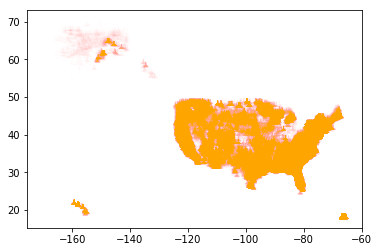

In [97]:
# visualize fire locations
import matplotlib.pyplot as plt

plt.scatter(df["LONGITUDE"], df["LATITUDE"], alpha=.003, marker="2", color="orange")
plt.show();

In [98]:
# generalizing lat/lon to two decimals to combine datasets

df["LAT_ROUND"] = round(df["LATITUDE"], 2)
df["LON_ROUND"] = round(df["LONGITUDE"], 2)

In [124]:
# lat/lon to 1 decimal place

df["LAT_ROUND_1"] = round(df["LATITUDE"], 1)
df["LON_ROUND_1"] = round(df["LONGITUDE"], 1)

In [99]:
# transform fire year and discovery day of year into tradtitional date format

import datetime

fire_year = df["FIRE_YEAR"].tolist()
day_of_year = df["DISCOVERY_DOY"].tolist()

fire_dates = tuple(zip(fire_year, day_of_year))

def to_date(fire_dates):
    dates = []
    for row in fire_dates:
        dates.append(datetime.datetime(row[0], 1, 1) + datetime.timedelta(row[1] - 1))
    return dates

dates = to_date(fire_dates)

In [100]:
df["DATE"] = dates

In [101]:
# adding month column

df["MONTH"] = df["DATE"].dt.month
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND,LON_ROUND,DATE,MONTH
0,FOUNTAIN,2005,33,Miscellaneous,0.10,40.036944,-121.005833,40.04,-121.01,2005-02-02,2
1,PIGEON,2004,133,Lightning,0.25,38.933056,-120.404444,38.93,-120.40,2004-05-12,5
2,SLACK,2004,152,Debris Burning,0.10,38.984167,-120.735556,38.98,-120.74,2004-05-31,5
3,DEER,2004,180,Lightning,0.10,38.559167,-119.913333,38.56,-119.91,2004-06-28,6
4,STEVENOT,2004,180,Lightning,0.10,38.559167,-119.933056,38.56,-119.93,2004-06-28,6


## Historical MODIS data

In [102]:
modis_df = pd.read_csv("fire_archive_M6_66499.csv")
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2


In [103]:
modis_df.shape

(1780524, 15)

In [104]:
# generalizing lat/lon to two decimals when combining datasets

modis_df["LAT_ROUND"] = round(modis_df["latitude"], 2)
modis_df["LON_ROUND"] = round(modis_df["longitude"], 2)
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.35,-155.06
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.34,-155.04
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.35,-155.05
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.35,-155.04
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.35,-155.07


In [123]:
# lat and lon to 1 decimal

modis_df["LAT_ROUND_1"] = round(modis_df["latitude"], 1)
modis_df["LON_ROUND_1"] = round(modis_df["longitude"], 1)

In [105]:
# adding Date and Year column to combine datasets on
import datetime

modis_df["DATE"] = pd.to_datetime(modis_df["acq_date"])
modis_df["FIRE_YEAR"] = pd.DatetimeIndex(modis_df["DATE"]).year
modis_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND,LON_ROUND,DATE,FIRE_YEAR
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.35,-155.06,2001-01-01,2001
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.34,-155.04,2001-01-01,2001
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.35,-155.05,2001-01-01,2001
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.35,-155.04,2001-01-01,2001
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.35,-155.07,2001-01-01,2001


In [106]:
# also adding day of year column to modis dataset

modis_df['DOY'] = modis_df['DATE'].dt.dayofyear

In [107]:
# lets do a month column as well

modis_df["MONTH"] = modis_df["DATE"].dt.month

## Merging datasets

In [132]:
merged = pd.merge(modis_df, df, how='left', on=['LAT_ROUND_1', 'LON_ROUND_1', 'FIRE_YEAR', 'MONTH'])
merged.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND_x,LON_ROUND_x,DATE_x,FIRE_YEAR,DOY,MONTH,LAT_ROUND_1,LON_ROUND_1,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND_y,LON_ROUND_y,DATE_y
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,311.8,255.8,N,2,19.35,-155.06,2001-01-01,2001,1,1,19.4,-155.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,Terra,MODIS,83,6.2,296.9,9.8,N,2,19.34,-155.04,2001-01-01,2001,1,1,19.3,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,293.6,19.6,N,2,19.35,-155.05,2001-01-01,2001,1,1,19.4,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,Terra,MODIS,100,6.2,303.1,92.9,N,2,19.35,-155.04,2001-01-01,2001,1,1,19.3,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,Terra,MODIS,87,6.2,291.4,11.8,N,2,19.35,-155.07,2001-01-01,2001,1,1,19.4,-155.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [133]:
merged.shape

(2037291, 32)

In [134]:
# these are the recorded fires

matches = merged.dropna()
matches.shape

(431813, 32)

In [136]:
# create column of ones to add to these matched rows
import numpy as np

matches["Recorded_fire"] = np.ones(matches.shape[0])
matches.head()

/Users/ljohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND_x,LON_ROUND_x,DATE_x,FIRE_YEAR,DOY,MONTH,LAT_ROUND_1,LON_ROUND_1,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND_y,LON_ROUND_y,DATE_y,Recorded_fire
44953,32.0523,-82.7224,301.0,2.5,1.5,2002-01-01,1657,Terra,MODIS,43,6.2,281.1,25.8,D,0,32.05,-82.72,2002-01-01,2002,1,1,32.1,-82.7,FY2002-WHEELER-039,26.0,Debris Burning,4.16,32.0639,-82.7204,32.06,-82.72,2002-01-26,1.0
44954,32.0523,-82.7224,301.0,2.5,1.5,2002-01-01,1657,Terra,MODIS,43,6.2,281.1,25.8,D,0,32.05,-82.72,2002-01-01,2002,1,1,32.1,-82.7,FY2002-WHEELER-041,28.0,Debris Burning,1.35,32.0811,-82.7003,32.08,-82.70,2002-01-28,1.0
44956,32.5510,-83.4348,301.2,2.2,1.4,2002-01-01,1657,Terra,MODIS,45,6.2,280.5,24.4,D,0,32.55,-83.43,2002-01-01,2002,1,1,32.6,-83.4,FY2002-TWIGGS-051,17.0,Debris Burning,1.58,32.6127,-83.4064,32.61,-83.41,2002-01-17,1.0
44959,32.2778,-83.5328,300.8,2.2,1.4,2002-01-01,1657,Terra,MODIS,41,6.2,282.2,19.6,D,0,32.28,-83.53,2002-01-01,2002,1,1,32.3,-83.5,FY2002-PULASKI-033,9.0,Debris Burning,1.18,32.2870,-83.5301,32.29,-83.53,2002-01-09,1.0
44962,32.2747,-83.5149,304.0,2.2,1.4,2002-01-01,1657,Terra,MODIS,58,6.2,282.1,25.7,D,0,32.27,-83.51,2002-01-01,2002,1,1,32.3,-83.5,FY2002-PULASKI-033,9.0,Debris Burning,1.18,32.2870,-83.5301,32.29,-83.53,2002-01-09,1.0


In [137]:
matches.confidence.value_counts(normalize=True).head()

100    0.176877
75     0.015727
94     0.014881
77     0.014705
70     0.014643
Name: confidence, dtype: float64

### Observations: Most specific to least

Testing a merge on Lat/Lon to 2 decimals, Date
- 9.5% "100" confidence values

Testing a merge on Lat/Lon to 2 decimals, Year, Month
 - 14% "100" confidence values

Testing a merge on Lat/Lon to 2 decimals, Year
 - 13% "100" confidence values

Testinga a merge on Lat/Lon to 1 decimal, Date
 - 13% "100" confidence values

Testing a merge on Lat/Lon to 1 decimal, Year, month
 - 17.7% "100" confidence values

Testing a merge on Lat/Lon to 1 decimal, Year
 - 13% "100" confidence values

(array([  5566.,   6914.,  13654.,  21902.,  31988.,  46592.,  59335.,
         62452.,  57963., 125447.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

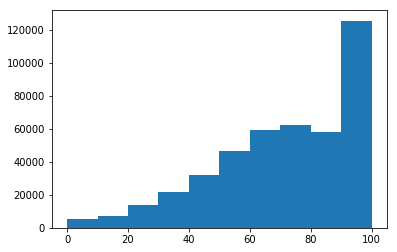

In [138]:
# looking at confidence level of matches

plt.hist(matches.confidence)

In [139]:
# merge back with full dataframe

remerged = pd.merge(merged, matches, how='outer')
remerged.shape

(2037293, 33)

In [140]:
remerged["Recorded_fire"].value_counts()

1.0    431815
Name: Recorded_fire, dtype: int64

In [141]:
remerged["Recorded_fire"].isnull().sum()

1605478

In [142]:
# add zeros as labels to rows that are not recorded fires

remerged["Recorded_fire"] = remerged["Recorded_fire"].fillna(value=0)
remerged["Recorded_fire"].value_counts(normalize=True)

0.0    0.788045
1.0    0.211955
Name: Recorded_fire, dtype: float64

In [39]:
# # This section for use when classes are too imbalanced

# #number of samples which are fires
# is_fire = len(remerged[remerged['Recorded_fire'] == 1])

# # indices of non fire samples
# non_fire_indices = remerged[remerged["Recorded_fire"] == 0].index

# # random sample non fire indices
# random_indices = np.random.choice(non_fire_indices, is_fire, replace=False)

# #find indices of fires
# fire_indices = remerged[remerged["Recorded_fire"] == 1].index

# # concat fire with non fire indices
# under_sample_indices = np.concatenate([fire_indices, random_indices])

# # get balanced dataframe
# under_sample = remerged.loc[under_sample_indices]

# under_sample["Recorded_fire"].value_counts()

In [143]:
remerged.satellite.value_counts()

Aqua     1033734
Terra    1003559
Name: satellite, dtype: int64

In [144]:
remerged.daynight.value_counts()

D    1629691
N     407602
Name: daynight, dtype: int64

In [145]:
# lets encode satellite and daynigt columns to use in model

remerged["satellite"] = remerged["satellite"].replace({"Aqua": 1, "Terra": 2})
remerged["daynight"] = remerged["daynight"].replace({"D": 1, "N": 2})
remerged.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,LAT_ROUND_x,LON_ROUND_x,DATE_x,FIRE_YEAR,DOY,MONTH,LAT_ROUND_1,LON_ROUND_1,FIRE_NAME,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,LAT_ROUND_y,LON_ROUND_y,DATE_y,Recorded_fire
0,19.3530,-155.0576,400.1,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,311.8,255.8,2,2,19.35,-155.06,2001-01-01,2001,1,1,19.4,-155.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
1,19.3378,-155.0360,311.6,1.0,1.0,2001-01-01,849,2,MODIS,83,6.2,296.9,9.8,2,2,19.34,-155.04,2001-01-01,2001,1,1,19.3,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
2,19.3544,-155.0482,322.2,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,293.6,19.6,2,2,19.35,-155.05,2001-01-01,2001,1,1,19.4,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
3,19.3468,-155.0375,362.5,1.0,1.0,2001-01-01,849,2,MODIS,100,6.2,303.1,92.9,2,2,19.35,-155.04,2001-01-01,2001,1,1,19.3,-155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0
4,19.3516,-155.0670,313.6,1.0,1.0,2001-01-01,849,2,MODIS,87,6.2,291.4,11.8,2,2,19.35,-155.07,2001-01-01,2001,1,1,19.4,-155.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0.0


In [146]:
features = ["brightness", "scan", "track", "acq_time", "satellite", "confidence",
            "version", "bright_t31", "frp", "daynight", "type"]

In [147]:
from sklearn.model_selection import train_test_split

X = remerged[features]
y = remerged["Recorded_fire"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [149]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_imputed, y_train.values)
y_pred = clf.predict(X_test_imputed)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.8313376315162998
0.6277093095695984


In [150]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_imputed, y_train.values)
y_pred = forest.predict(X_test_imputed)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.892916833350104
0.7012529955494694


## Checking out a Regression model for fun

In [151]:
from sklearn.ensemble import RandomForestRegressor

features = ["brightness", "scan", "track", "acq_time", "satellite", "Recorded_fire",
            "version", "bright_t31", "frp", "daynight", "type"]

X = remerged[features]
y = remerged["confidence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [152]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [153]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_imputed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [154]:
predictions = rf.predict(X_test_imputed)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 7.47


In [157]:
mape = 100 * (errors / y_test)

accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

Accuracy: -inf %.


In [156]:
rf.score(X_test_imputed, y_test)

0.7038010276089403